这次准备用自己的电脑做房价预测。

最后的评价标准为均方根误差（RMSE）。
![RMSE](images\3.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import f_oneway

In [2]:
pd.set_option('display.max_rows', 100)


In [3]:
train_df = pd.read_csv("E:\\house-prices-advanced-regression-techniques\\house-prices-advanced-regression-techniques\\train.csv")
test_df = pd.read_csv("E:\\house-prices-advanced-regression-techniques\\house-prices-advanced-regression-techniques\\test.csv")



In [4]:
dataset = pd.concat([train_df, test_df], axis=0, ignore_index=True)
train_len = len(train_df)
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
dataset.drop(columns=['Id'], inplace=True)

**<h1>代码初步探索**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [7]:
dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
dataset.duplicated().any()

np.False_

In [9]:
dataset.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [10]:
null_counts = dataset.isnull().sum()          # 计算每列的缺失值数量
null_counts = null_counts[null_counts > 0]    # 只保留缺失值数量 > 0 的列
null_counts

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [11]:
# 计算每列的缺失率（NaN 的比例）
missing_ratio = dataset.isnull().mean() * 100  # 转为百分比

# 筛选缺失率 > 90% 的列
high_missing_cols = missing_ratio[missing_ratio > 90]
print(high_missing_cols)

Alley          93.216855
PoolQC         99.657417
MiscFeature    96.402878
dtype: float64


In [12]:
#删除缺失率 > 90% 的列
dataset = dataset.drop(columns=high_missing_cols.index)
# 重新分割
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()

这是留下列的类型
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. 

| 字段名            | 描述                                                                 |
|-------------------|----------------------------------------------------------------------|
| MSSubClass        | The building class                                                   |
| MSZoning          | The general zoning classification                                    |
| LotFrontage       | Linear feet of street connected to property                          |
| LotArea           | Lot size in square feet                                              |
| Street            | Type of road access                                                  |
| LotShape          | General shape of property                                            |
| LandContour       | Flatness of the property                                             |
| Utilities         | Type of utilities available                                          |
| LotConfig         | Lot configuration                                                    |
| LandSlope         | Slope of property                                                    |
| Neighborhood      | Physical locations within Ames city limits                           |
| Condition1        | Proximity to main road or railroad                                   |
| Condition2        | Proximity to main road or railroad (if a second is present)          |
| BldgType          | Type of dwelling                                                     |
| HouseStyle        | Style of dwelling                                                    |
| OverallQual       | Overall material and finish quality                                  |
| OverallCond       | Overall condition rating                                             |
| YearBuilt         | Original construction date                                           |
| YearRemodAdd      | Remodel date                                                         |
| RoofStyle         | Type of roof                                                         |
| RoofMatl          | Roof material                                                        |
| Exterior1st       | Exterior covering on house                                           |
| Exterior2nd       | Exterior covering on house (if more than one material)               |
| MasVnrType        | Masonry veneer type                                                  |
| MasVnrArea        | Masonry veneer area in square feet                                   |
| ExterQual         | Exterior material quality                                            |
| ExterCond         | Present condition of the material on the exterior                    |
| Foundation        | Type of foundation                                                   |
| BsmtQual          | Height of the basement                                               |
| BsmtCond          | General condition of the basement                                    |
| BsmtExposure      | Walkout or garden level basement walls                               |
| BsmtFinType1      | Quality of basement finished area                                    |
| BsmtFinSF1        | Type 1 finished square feet                                          |
| BsmtFinType2      | Quality of second finished area (if present)                         |
| BsmtFinSF2        | Type 2 finished square feet                                          |
| BsmtUnfSF         | Unfinished square feet of basement area                              |
| TotalBsmtSF       | Total square feet of basement area                                   |
| Heating           | Type of heating                                                      |
| HeatingQC         | Heating quality and condition                                        |
| CentralAir        | Central air conditioning                                             |
| Electrical        | Electrical system                                                    |
| 1stFlrSF          | First Floor square feet                                              |
| 2ndFlrSF          | Second floor square feet                                             |
| LowQualFinSF      | Low quality finished square feet (all floors)                        |
| GrLivArea         | Above grade (ground) living area square feet                         |
| BsmtFullBath      | Basement full bathrooms                                              |
| BsmtHalfBath      | Basement half bathrooms                                              |
| FullBath          | Full bathrooms above grade                                           |
| HalfBath          | Half baths above grade                                               |
| Bedroom           | Number of bedrooms above basement level                              |
| Kitchen           | Number of kitchens                                                   |
| KitchenQual       | Kitchen quality                                                      |
| TotRmsAbvGrd      | Total rooms above grade (does not include bathrooms)                 |
| Functional        | Home functionality rating                                            |
| Fireplaces        | Number of fireplaces                                                 |
| FireplaceQu       | Fireplace quality                                                    |
| GarageType        | Garage location                                                      |
| GarageYrBlt       | Year garage was built                                                |
| GarageFinish      | Interior finish of the garage                                        |
| GarageCars        | Size of garage in car capacity                                       |
| GarageArea        | Size of garage in square feet                                        |
| GarageQual        | Garage quality                                                       |
| GarageCond        | Garage condition                                                     |
| PavedDrive        | Paved driveway                                                       |
| WoodDeckSF        | Wood deck area in square feet                                        |
| OpenPorchSF       | Open porch area in square feet                                       |
| EnclosedPorch     | Enclosed porch area in square feet                                   |
| 3SsnPorch         | Three season porch area in square feet                               |
| ScreenPorch       | Screen porch area in square feet                                     |
| PoolArea          | Pool area in square feet                                             |
| Fence             | Fence quality                                                        |
| MiscVal           | $Value of miscellaneous feature                                      |
| MoSold            | Month Sold                                                           |
| YrSold            | Year Sold                                                            |
| SaleType          | Type of sale                                                         |
| SaleCondition     | Condition of sale                                                    |

首先对数字特征进行整理

In [13]:
#查看数值特征和Saleprice的相关性
corr_matrix = train_df.select_dtypes(include=['number']).corr()
corr_matrix['SalePrice'].sort_values(ascending=False)



SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [14]:
# 选择与 SalePrice 相关性较高的特征
high_corr_features = corr_matrix['SalePrice'][corr_matrix['SalePrice'].abs() > 0.4].index.tolist()
high_corr_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [15]:
#查找与SalePrice 相关性较高的特征中是否有缺失值
high_corr_with_nulls = [col for col in high_corr_features if col in null_counts.index]
high_corr_with_nulls

['MasVnrArea',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

1.对TotalBsmtSF进行分析  
没有地下室面积可能是没有地下室的  
也有一种可能是没有计算出来的，需要计算一下  

In [16]:
#TotalBsmtSF清洗                 ：地下室总面积（平方英尺）
m = dataset['TotalBsmtSF'].isnull().sum() 
print(m)

m = train_df['TotalBsmtSF'].isnull().sum()
print(m)
#说明：在训练集中没有缺失值，缺失值再测试集中


1
0


BsmtFinSF1      1  :1型成品平方英尺  
BsmtFinSF2      1  :2型完工平方英尺  
BsmtUnfSF       1  :地下室面积未完工平方英尺  

In [17]:
rows = test_df['TotalBsmtSF'].isnull()
null_rows = test_df[rows]
selected_cols = ['BsmtCond','BsmtFinType1','TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
null_rows[selected_cols]

,BsmtCond,BsmtFinType1,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
2120,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#得出结论来，这个房子没有地下室
# 仅对这些行的 'TotalBsmtSF' 列填充 0
test_df.loc[rows, 'TotalBsmtSF'] = 0
dataset = pd.concat([train_df, test_df], axis=0, ignore_index=True)


In [19]:
# 1. 随机选择一行索引
random_idx = np.random.choice(train_df.index)
# 2. 定义要提取的列
target_columns = ['BsmtExposure','BsmtCond','BsmtQual','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF']

# 3. 提取数据
result = train_df.loc[random_idx, target_columns]
result

BsmtExposure       No
BsmtCond           TA
BsmtQual           TA
BsmtFinSF1      248.0
BsmtFinSF2      240.0
BsmtUnfSF       448.0
TotalBsmtSF     936.0
Name: 1094, dtype: object

可以从上面得出结论total = sf1 + sf2 + sf  
BsmtQual                                                   
| BsmtCond                                              
| BsmtExposure                                      
| BsmtFinType1                                            
| BsmtFinSF1                                               
| BsmtFinType2                                 
| BsmtFinSF2                                                  
| BsmtUnfSF        
直接对这些关于地下室的特征进行分析 


In [20]:
cond_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
dataset['BsmtCond_Encoded'] = dataset['BsmtCond'].map(cond_map)
dataset['BsmtQual_Encoded'] = dataset['BsmtQual'].map(cond_map)

# 3. 生成交互特征
dataset['BsmtScore'] = dataset['BsmtCond_Encoded'] * dataset['TotalBsmtSF']
dataset['BsmtScore1'] = dataset['BsmtQual_Encoded'] * dataset['TotalBsmtSF']
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()
# 4. 训练模型
model = RandomForestRegressor()
model.fit(train_df[['BsmtQual_Encoded','BsmtCond_Encoded', 'TotalBsmtSF', 'BsmtScore','BsmtScore1']], train_df['SalePrice'])
# 5. 查看特征重要性
print(pd.Series(model.feature_importances_, 
               index=['BsmtQual_Encoded','BsmtCond_Encoded', 'TotalBsmtSF', 'BsmtScore','BsmtScore1']))
print(train_df[['BsmtQual_Encoded', 'BsmtCond_Encoded']].corr())


BsmtQual_Encoded    0.043456
BsmtCond_Encoded    0.002864
TotalBsmtSF         0.108644
BsmtScore           0.123156
BsmtScore1          0.721881
dtype: float64
                  BsmtQual_Encoded  BsmtCond_Encoded
BsmtQual_Encoded          1.000000          0.210796
BsmtCond_Encoded          0.210796          1.000000


In [21]:
exposure_map = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': -1}
dataset['BsmtExposure_Encoded'] = dataset['BsmtExposure'].map(exposure_map)
#把,'BsmtCond_Encoded'留下
dataset.drop(['BsmtExposure','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtQual','BsmtQual_Encoded','BsmtScore','TotalBsmtSF'],axis=1, inplace=True)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()

2.MasVnrArea         :     砌体贴面面积（平方英尺）  
MasVnrType              :     砌体贴面类型         
思考：是否因为MasVnrType没类型导致的铁面面积没有？还是只是缺少数值，那么可以用类型的中位数填充缺失值   
RoofStyle         | Type of roof                                                         |   
| RoofMatl          | Roof material                                                        |  
| Exterior1st       | Exterior covering on house                                           |  
| Exterior2nd       | Exterior covering on house (if more than one material)               |  
| MasVnrType        | Masonry veneer type                                                    |  
| MasVnrArea        | Masonry veneer area in square feet                                   |  
| ExterQual         | Exterior material quality                                            |  
| ExterCond         | Present condition of the material on the exterior                    |  
| Foundation        | Type of foundation                                                   |  

In [22]:
m = dataset['MasVnrArea'].isnull().sum() 
print(m)
m = dataset['MasVnrType'].isnull().sum() 
print(m)

# 检查两列中任意一列为缺失值的行
missing_either = dataset[dataset[['MasVnrArea', 'MasVnrType']].isna().any(axis=1)]
missing_either[['MasVnrArea', 'MasVnrType']]


23
1766


,MasVnrArea,MasVnrType
1,0.0,NaN
3,0.0,NaN
5,0.0,NaN
8,0.0,NaN
9,0.0,NaN
...,...,...
2913,0.0,NaN
2914,0.0,NaN
2915,0.0,NaN
2916,0.0,NaN


In [23]:
dataset['MasVnrArea'].describe()

count    2896.000000
mean      102.201312
std       179.334253
min         0.000000
25%         0.000000
50%         0.000000
75%       164.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

MasVnrType
NaN        1766
BrkFace     879
Stone       249
BrkCmn       25
Name: count, dtype: int64


<Axes: xlabel='MasVnrType', ylabel='MasVnrArea'>

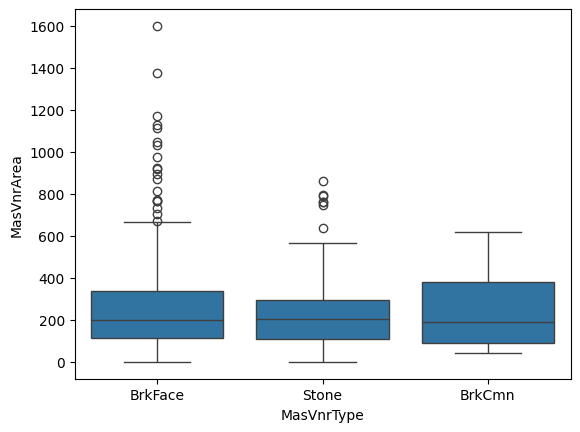

In [24]:
# 查看唯一值及其出现次数（自动排除NaN，除非 dropna=False）
value_counts = dataset['MasVnrType'].value_counts(dropna=False)
print(value_counts)
#箱线图
sns.boxplot(x='MasVnrType', y='MasVnrArea', data=train_df)


In [25]:
# 按饰面类型分组统计房价
# 将 NaN 替换为 'None'（或其他自定义标签）
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()
print(train_df.groupby('MasVnrType')['SalePrice'].describe())
# 按面积分箱统计房价
train_df['VnrArea_Bin'] = pd.cut(train_df['MasVnrArea'], bins=[0, 1, 100, 300, 1000], labels=['None', 'Small', 'Medium', 'Large'])
print(train_df.groupby('VnrArea_Bin')['SalePrice'].mean())

            count           mean           std       min       25%       50%  \
MasVnrType                                                                     
BrkCmn       15.0  146318.066667  46187.583632   89471.0  114250.0  139000.0   
BrkFace     445.0  204691.871910  81214.293554   75000.0  149300.0  181000.0   
None        872.0  156958.243119  61491.688969   34900.0  119000.0  143125.0   
Stone       128.0  265583.625000  99940.156577  119000.0  194650.0  246839.0   

                 75%       max  
MasVnrType                      
BrkCmn      163950.0  277000.0  
BrkFace     236000.0  755000.0  
None        184025.0  745000.0  
Stone       312779.0  611657.0  
VnrArea_Bin
None      152250.000000
Small     185330.538462
Medium    200859.843333
Large     258017.115152
Name: SalePrice, dtype: float64


C:\Users\JIEJIE\AppData\Local\Temp\ipykernel_16844\4078494796.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby('VnrArea_Bin')['SalePrice'].mean())


In [26]:
cond_map = {'Stone':3, 'BrkFace':2, 'BrkCmn':1, 'None':1}
dataset['MasVnrType_1'] = dataset['MasVnrType'].map(cond_map)

# 3. 生成交互特征
dataset['VnrScore'] = dataset['MasVnrType_1'] * dataset['MasVnrArea']

train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()
# 4. 训练模型
model = RandomForestRegressor()
model.fit(train_df[['MasVnrType_1','MasVnrArea','VnrScore' ]], train_df['SalePrice'])
# 5. 查看特征重要性
print(pd.Series(model.feature_importances_, 
               index=['MasVnrType_1','MasVnrArea','VnrScore']))



MasVnrType_1    0.061803
MasVnrArea      0.281789
VnrScore        0.656408
dtype: float64


In [27]:
dataset.drop(['MasVnrType_1','MasVnrArea'],axis=1, inplace=True)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()

对
RoofStyle         | Type of roof     屋顶类型                                          |     
| RoofMatl          | Roof material        屋面材料                                     |    
| Exterior1st       | Exterior covering on house                   房屋外墙        |    
| Exterior2nd       | Exterior covering on house (if more than one material)房屋外部覆盖物（如果使用多种材料）|     

In [28]:
# 查看唯一值及其出现次数（自动排除NaN，除非 dropna=False）
value_counts1 = dataset['RoofStyle'].value_counts(dropna=False)
print(value_counts1)
m = dataset['RoofStyle'].isnull().sum() 
print(m)
# 合并罕见类别（如样本量<50的合并为'Other'）
dataset['RoofStyle'] = dataset['RoofStyle'].apply(
    lambda x: x if x in ['Gable', 'Hip'] else 'Other'
)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()
print(train_df.groupby('RoofStyle')['SalePrice'].describe())

cond_map = {'Hip':3,'other':2, 'Gable':1 }
dataset['RoofStyle'] = dataset['RoofStyle'].map(cond_map)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()
model = RandomForestRegressor()
model.fit(train_df[['RoofStyle','VnrScore','GarageCars','BsmtScore1' ]], train_df['SalePrice'])
# 5. 查看特征重要性
print(pd.Series(model.feature_importances_, 
               index=['RoofStyle','VnrScore','GarageCars','BsmtScore1']))
dataset.drop(['RoofStyle'],axis=1, inplace=True)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()



RoofStyle
Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64
0
            count           mean            std      min       25%       50%  \
RoofStyle                                                                      
Gable      1141.0  171483.956179   66331.237296  34900.0  128000.0  160000.0   
Hip         286.0  218876.933566  111549.603563  55000.0  139675.0  176500.0   
Other        33.0  178271.181818   64197.882202  40000.0  129000.0  180000.0   

                75%       max  
RoofStyle                      
Gable      202500.0  755000.0  
Hip        277875.0  745000.0  
Other      241500.0  274970.0  
RoofStyle     0.020112
VnrScore      0.111141
GarageCars    0.213593
BsmtScore1    0.655155
dtype: float64


In [29]:
value_counts2 = dataset['RoofMatl'].value_counts(dropna=False)
print(value_counts2)
m = dataset['RoofMatl'].isnull().sum() 
print(m)
print(train_df.groupby('RoofMatl')['SalePrice'].describe())
dataset.drop(['RoofMatl'],axis=1, inplace=True)
train_df = dataset.iloc[:train_len].copy()
test_df = dataset.iloc[train_len:].copy()

RoofMatl
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
0
           count           mean            std       min       25%       50%  \
RoofMatl                                                                       
ClyTile      1.0  160000.000000            NaN  160000.0  160000.0  160000.0   
CompShg   1434.0  179803.679219   77722.388636   34900.0  129900.0  162000.0   
Membran      1.0  241500.000000            NaN  241500.0  241500.0  241500.0   
Metal        1.0  180000.000000            NaN  180000.0  180000.0  180000.0   
Roll         1.0  137000.000000            NaN  137000.0  137000.0  137000.0   
Tar&Grv     11.0  185406.363636   65430.141720   82000.0  136000.0  167000.0   
WdShake      5.0  241400.000000   36218.779659  190000.0  228000.0  242000.0   
WdShngl      6.0  390250.000000  206969.019421  168500.0  278500.0  332500.0   

               75%       max  
Roo

In [ ]:
#Exterior1st
value_counts2 = dataset['Exterior1st'].value_counts(dropna=False)
print(value_counts2)
m = dataset['Exterior1st'].isnull().sum() 
print(m)
m = train_df['Exterior1st'].isnull().sum() 
print(m)
most_common = train_df['Exterior1st'].mode()[0]  # 取训练集的众数
dataset['Exterior1st'].fillna(most_common, inplace=True)
# 合并罕见类别（如样本量<50的合并为'Other'）
dataset['Exterior1st'] = dataset['Exterior1st'].apply(
    lambda x: x if x in ['Gable', 'Hip'] else 'Other'
)


Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: count, dtype: int64
1
0


C:\Users\JIEJIE\AppData\Local\Temp\ipykernel_16844\4143652385.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Exterior1st'].fillna(most_common, inplace=True)


KeyError: 'RoofStyle'

In [ ]:
#Exterior2nd
value_counts2 = dataset['Exterior1st'].value_counts(dropna=False)
print(value_counts2)
m = dataset['Exterior1st'].isnull().sum() 
print(m)

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: count, dtype: int64
1


GarageYrBlt       ：车库建成年份
也是两种可能


GarageCars'           ：   车库的大小（以汽车容量计）

'GarageArea'             ：车库面积（平方英尺）

In [ ]:
#查看数字特征与目标值之间的关系


In [ ]:
#对剩下的数据进行补全
null_counts = null_counts[null_counts<10]
null_counts

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64